In [1]:
import yfinance as yf # calls yahoo finance api to download daily finance prices
import pandas as pd
import os

In [2]:
sp500 = yf.Ticker("^GSPC") #Ticker for downloading price history ^GSPC representing the S&P 500 index using the yfinance library.

In [3]:
sp500 = sp500.history(period="max") #query history prices

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-22 00:00:00-04:00,5544.540039,5570.359863,5529.040039,5564.410156,3375180000,0.0,0.0
2024-07-23 00:00:00-04:00,5565.299805,5585.339844,5550.899902,5555.740234,3500210000,0.0,0.0
2024-07-24 00:00:00-04:00,5505.839844,5508.040039,5419.979980,5427.129883,3945550000,0.0,0.0


In [5]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-07-15 00:00:00-04:00', '2024-07-16 00:00:00-04:00',
               '2024-07-17 00:00:00-04:00', '2024-07-18 00:00:00-04:00',
               '2024-07-19 00:00:00-04:00', '2024-07-22 00:00:00-04:00',
               '2024-07-23 00:00:00-04:00', '2024-07-24 00:00:00-04:00',
               '2024-07-25 00:00:00-04:00', '2024-07-26 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24258, freq=None)

<AxesSubplot:xlabel='Date'>

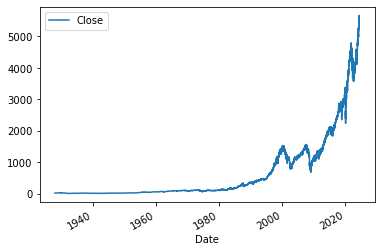

In [6]:
sp500.plot.line(y="Close",use_index=True)

In [7]:
del sp500 [ "Dividends"]

In [8]:
del sp500["Stock Splits"]

In [9]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
#shift next day's closing price to tomorrow column

In [10]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-07-22 00:00:00-04:00,5544.540039,5570.359863,5529.040039,5564.410156,3375180000,5555.740234
2024-07-23 00:00:00-04:00,5565.299805,5585.339844,5550.899902,5555.740234,3500210000,5427.129883
2024-07-24 00:00:00-04:00,5505.839844,5508.040039,5419.979980,5427.129883,3945550000,5399.220215


In [11]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [12]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-07-22 00:00:00-04:00,5544.540039,5570.359863,5529.040039,5564.410156,3375180000,5555.740234,0
2024-07-23 00:00:00-04:00,5565.299805,5585.339844,5550.899902,5555.740234,3500210000,5427.129883,0
2024-07-24 00:00:00-04:00,5505.839844,5508.040039,5419.979980,5427.129883,3945550000,5399.220215,0


In [13]:
sp500 = sp500.loc["1990-01-01":].copy() #greater than this date

In [14]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-07-22 00:00:00-04:00,5544.540039,5570.359863,5529.040039,5564.410156,3375180000,5555.740234,0
2024-07-23 00:00:00-04:00,5565.299805,5585.339844,5550.899902,5555.740234,3500210000,5427.129883,0
2024-07-24 00:00:00-04:00,5505.839844,5508.040039,5419.979980,5427.129883,3945550000,5399.220215,0


In [15]:
#randomforest helps in picking up with non linear relationships between the points which is necessary in this case
#randomforest takes the average of bunch of decision tress and less overfits compared to other models

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state=1)#to split an internal node
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]
predictors = ["Close","Volume","Open","High","Low"]
model.fit(train[predictors],train["Target"])#train the model using the predictors to generate target

RandomForestClassifier(min_samples_split=100, random_state=1)

In [18]:
from sklearn.metrics import precision_score
pred = model.predict(test[predictors])
pred = pd.Series(pred,index = test.index)

In [19]:
pred

Date
2024-03-05 00:00:00-05:00    0
2024-03-06 00:00:00-05:00    0
2024-03-07 00:00:00-05:00    0
2024-03-08 00:00:00-05:00    0
2024-03-11 00:00:00-04:00    0
                            ..
2024-07-22 00:00:00-04:00    0
2024-07-23 00:00:00-04:00    0
2024-07-24 00:00:00-04:00    0
2024-07-25 00:00:00-04:00    0
2024-07-26 00:00:00-04:00    0
Length: 100, dtype: int32

In [20]:
precision_score(test["Target"],pred)

0.7142857142857143

In [21]:
combination = pd.concat([test["Target"],pred],axis =1)

<AxesSubplot:xlabel='Date'>

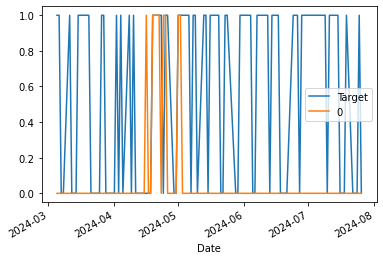

In [22]:
combination.plot()

In [23]:
#backtesting the model 
#writting everything that we've already done in one function 
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [24]:
#very training year has 250 days start= 2500 defines taking data from 10 years and training the model on that with step = 250 which means going to the next year
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [25]:
predictions = backtest(sp500, model, predictors)

In [26]:
predictions["Predictions"].value_counts()

0    3612
1    2596
Name: Predictions, dtype: int64

In [27]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5288906009244992

In [28]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.535277
0    0.464723
Name: Target, dtype: float64

In [29]:
#add predictors to model to make it more accurate
horizons = [2,5,60,250,1000]# rolling avg of past 2 days , 5 days , 60 days ..
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]


In [30]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [31]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-22 00:00:00-04:00,5544.540039,5570.359863,5529.040039,5564.410156,3375180000,5555.740234,0,1.005367,1.0,0.998299,2.0,1.037054,39.0,1.146367,141.0,1.302800,531.0
2024-07-23 00:00:00-04:00,5565.299805,5585.339844,5550.899902,5555.740234,3500210000,5427.129883,0,0.999220,1.0,1.000745,1.0,1.033809,39.0,1.143649,140.0,1.300067,531.0
2024-07-24 00:00:00-04:00,5505.839844,5508.040039,5419.979980,5427.129883,3945550000,5399.220215,0,0.988290,0.0,0.983287,1.0,1.008854,38.0,1.116384,140.0,1.269332,530.0


In [32]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [33]:

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [34]:
predictions = backtest(sp500, model, new_predictors)

In [35]:
predictions["Predictions"].value_counts()


0.0    4369
1.0     839
Name: Predictions, dtype: int64

In [36]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5744934445768772

In [37]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.544931
0    0.455069
Name: Target, dtype: float64

In [38]:

predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,1.0
2003-11-18 00:00:00-05:00,1,1.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,1,1.0
...,...,...
2024-07-22 00:00:00-04:00,0,0.0
2024-07-23 00:00:00-04:00,0,0.0
2024-07-24 00:00:00-04:00,0,1.0
